<a href="https://colab.research.google.com/github/gilbert83416/ML/blob/main/iris_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from sklearn.datasets import load_iris
import numpy as np  
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['ans'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,[2,3]], iris.target, test_size = 0.3, random_state = 1, stratify = iris.target)
X_train, X_test, y_train, y_test 

(array([[1.4, 0.2],
        [1.7, 0.2],
        [5.3, 2.3],
        [5.7, 2.1],
        [1.2, 0.2],
        [5.6, 2.4],
        [6.6, 2.1],
        [1.2, 0.2],
        [5.8, 1.6],
        [4.6, 1.3],
        [3.3, 1. ],
        [3.9, 1.4],
        [1.3, 0.2],
        [4.7, 1.2],
        [4. , 1.3],
        [5.1, 1.9],
        [1.9, 0.2],
        [3.5, 1. ],
        [3.9, 1.2],
        [1.6, 0.2],
        [4.8, 1.8],
        [6.9, 2.3],
        [4.5, 1.5],
        [4.5, 1.3],
        [3.8, 1.1],
        [5.6, 2.4],
        [4.7, 1.4],
        [5.6, 1.4],
        [5.8, 2.2],
        [5.1, 2.4],
        [4.1, 1.3],
        [1.5, 0.4],
        [6.7, 2.2],
        [5. , 1.9],
        [4.8, 1.8],
        [5.6, 2.1],
        [4.2, 1.5],
        [6.7, 2. ],
        [5.5, 1.8],
        [1.6, 0.2],
        [4.9, 1.8],
        [1.4, 0.2],
        [5.1, 1.5],
        [1.9, 0.4],
        [1. , 0.2],
        [4.9, 1.5],
        [1.5, 0.2],
        [1.1, 0.1],
        [5.5, 1.8],
        [4.7, 1.5],


In [112]:
# 特徵縮放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [113]:
from sklearn.linear_model import Perceptron
# eta = 學習速率, random_state: 每輪processing後 reproducibility
perc = Perceptron(eta0 = 0.1, random_state=1)
perc.fit(X_train_std,y_train)

pred = perc.predict(X_test_std)
misclassified = (pred !=y_test).sum()
# check the quantity of wrong classification 
print(misclassified)

1


In [114]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, y_test)
acc

0.9777777777777777

In [117]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = iris.data[:,[2,3]][test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=100, label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


2



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


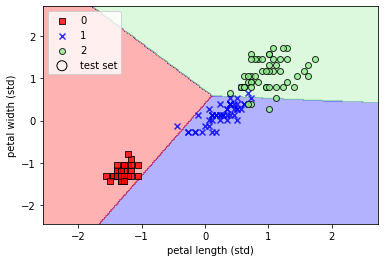

<Figure size 1008x1008 with 0 Axes>

In [120]:
import matplotlib.pyplot as plt


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
print(X_combined_std.shape[1])
print()
plot_decision_regions(X = X_combined_std, 
                      y = y_combined, 
                      classifier = perc,
                      test_idx = range(135,150))
plt.xlabel('petal length (std)')
plt.ylabel('petal width (std)')
plt.legend(loc = 'upper left')
plt.figure(figsize=(14,14))
plt.show()